Ref: https://datahack.analyticsvidhya.com/contest/india-ml-hiring-hackathon-2019/

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import xgboost as xgb
%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
list(data)

['loan_id',
 'source',
 'financial_institution',
 'interest_rate',
 'unpaid_principal_bal',
 'loan_term',
 'origination_date',
 'first_payment_date',
 'loan_to_value',
 'number_of_borrowers',
 'debt_to_income_ratio',
 'borrower_credit_score',
 'loan_purpose',
 'insurance_percent',
 'co-borrower_credit_score',
 'insurance_type',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'm13']

In [5]:
pd.crosstab(data["insurance_type"], data["m13"], normalize="index")

m13,0,1
insurance_type,,
0.0,0.994545,0.005455
1.0,0.986772,0.013228


In [6]:
pd.crosstab(data["insurance_type"], data["m13"])

m13,0,1
insurance_type,,
0.0,115049,631
1.0,373,5


Data Types:

* 'source' - categorical
* 'financial_institution' - categorical
* 'interest_rate' - numerical
* 'unpaid_principal_bal' - numerical
* 'loan_term' - numerical
* 'origination_date' - date. can be considered as categorical as only few vals are present
* 'first_payment_date' - date. can be considered as categorical as only few vals are present. Diff of this and prev variables can be considered
* 'loan_to_value' - numerical
* 'number_of_borrowers' - numerical
* 'debt_to_income_ratio' - numerical
* 'borrower_credit_score' - numerical
* 'loan_purpose' - categorical
* 'insurance_percent' - numerical
* 'co-borrower_credit_score' - numerical
* 'insurance_type' - categorical
* 'm1', - this and below all are numerical
* 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'm13'

In [3]:
cat_vars = ["source", "financial_institution", "loan_purpose", "insurance_type"]

In [7]:
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [8]:
test_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,...,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,...,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,...,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,...,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,...,0,0,0,0,0,0,0,0,0,0


# Converting categorical variables to one-hot encoding and creating summary delinquency variables

In [7]:
test_data["m13"] = -1
data["train_flag"] = 1
test_data["train_flag"] = 0

full_data = pd.concat([data, test_data])

In [8]:
full_data = pd.get_dummies(full_data, columns=cat_vars, drop_first=True)

In [9]:
data = full_data[full_data["train_flag"]==1]
test_data = full_data[full_data["train_flag"]==0]
data = data.drop(columns=["train_flag"])
test_data = test_data.drop(columns=["m13", "train_flag"])

In [10]:
data["total_delinquencies"] = data[["m"+ str(i) for i in range(1,12)]].sum(axis=1)
test_data["total_delinquencies"] = test_data[["m"+ str(i) for i in range(1,12)]].sum(axis=1)

data["max_delinquencies"] = data[["m"+ str(i) for i in range(1,12)]].max(axis=1)
test_data["max_delinquencies"] = test_data[["m"+ str(i) for i in range(1,12)]].max(axis=1)

data["delinquency_cnt"] = data[["m"+ str(i) for i in range(1,12)]].apply(lambda x:x.astype(bool), axis=1).sum(axis=1)
test_data["delinquency_cnt"] = test_data[["m"+ str(i) for i in range(1,12)]].apply(lambda x:x.astype(bool), axis=1).sum(axis=1)

# Feature Exploration

In [4]:
def value_counts(df, col_name):
    df1 = pd.DataFrame(df[col_name].value_counts())
    df2 = pd.DataFrame(df[col_name].value_counts(normalize=True))
    return df1.join(df2, rsuffix="_z")

In [5]:
for n, col in enumerate(list(data)):
    if data.dtypes[n]=="O":
        print(col)
        print(value_counts(data, col))
        print(pd.crosstab(data[col], data["m13"], normalize="index"))
        print("\nTest")
        print(value_counts(test_data, col))
        print("\n")

source
   source  source_z
X   63858  0.550225
Y   37554  0.323580
Z   14646  0.126196
m13            0         1
source                    
X       0.995224  0.004776
Y       0.993423  0.006577
Z       0.994265  0.005735

Test
   source  source_z
X   19714  0.549657
Y   11653  0.324904
Z    4499  0.125439


financial_institution
                             financial_institution  financial_institution_z
OTHER                                        49699                 0.428226
Browning-Hart                                31852                 0.274449
Swanson, Newton and Miller                    6874                 0.059229
Edwards-Hoffman                               4857                 0.041850
Martinez, Duffy and Bird                      4715                 0.040626
Miller, Mcclure and Allen                     3158                 0.027211
Nicholson Group                               2116                 0.018232
Turner, Baldwin and Rhodes                    1846          

In [11]:
pd.crosstab(data["number_of_borrowers"], data["m13"], normalize="index")

m13,0,1
number_of_borrowers,,
1.0,0.990956,0.009044
2.0,0.996964,0.003036


## Pair-wise distribution observations from categorical features:
From the previous cross-tab tables, we can see that the following features seem to have some relation with the delinquency chances:
1. Insurance type
2. Loan purpose
3. First payment date (Feb 2012 has higher risk even though support is much smaller)
4. If there are two borrowers, the risk goes down to 1/3rd

In [6]:
def scatter_with_labels(df, col1, col2, label_col):
    colors = np.array(['#377eb8', '#ff7f00'])
    plt.scatter(df[col1], df[col2] , alpha=0.5, c=colors[df[label_col]])
    plt.xlabel(col1)
    plt.ylabel(col2)

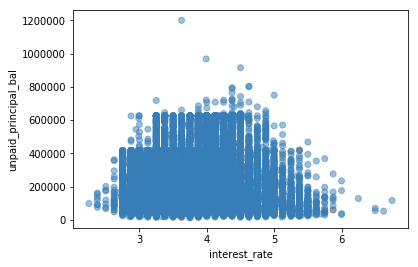

In [64]:
scatter_with_labels(data, "interest_rate", "unpaid_principal_bal", "m13")

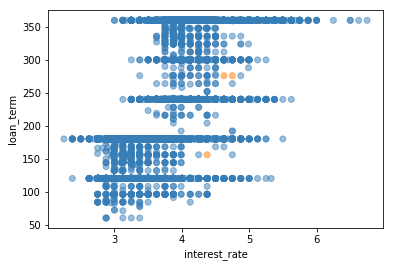

In [65]:
scatter_with_labels(data, "interest_rate", "loan_term", "m13")

In [66]:
list(data)

['loan_id',
 'source',
 'financial_institution',
 'interest_rate',
 'unpaid_principal_bal',
 'loan_term',
 'origination_date',
 'first_payment_date',
 'loan_to_value',
 'number_of_borrowers',
 'debt_to_income_ratio',
 'borrower_credit_score',
 'loan_purpose',
 'insurance_percent',
 'co-borrower_credit_score',
 'insurance_type',
 'm1',
 'm2',
 'm3',
 'm4',
 'm5',
 'm6',
 'm7',
 'm8',
 'm9',
 'm10',
 'm11',
 'm12',
 'm13']

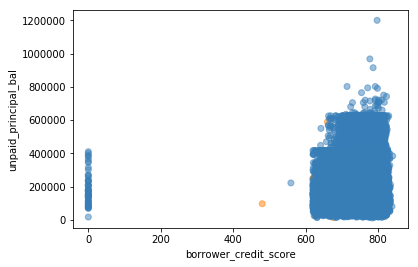

In [68]:
scatter_with_labels(data, "borrower_credit_score", "unpaid_principal_bal", "m13")

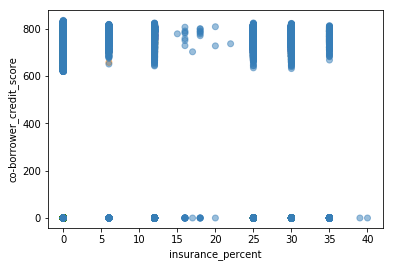

In [71]:
scatter_with_labels(data, "insurance_percent", "co-borrower_credit_score", "m13")

In [11]:
print(pd.crosstab(data["m12"], data["m13"], normalize="index"))

#scatter_with_labels(data, "delinquency_cnt", "max_delinquencies", "m13")

m13         0         1
m12                    
0    0.997092  0.002908
1    0.530055  0.469945
2    0.085106  0.914894
3    0.000000  1.000000
4    0.066667  0.933333
5    0.000000  1.000000
6    0.071429  0.928571
7    0.142857  0.857143
8    0.000000  1.000000
9    0.000000  1.000000
10   0.000000  1.000000
11   0.000000  1.000000
14   0.000000  1.000000


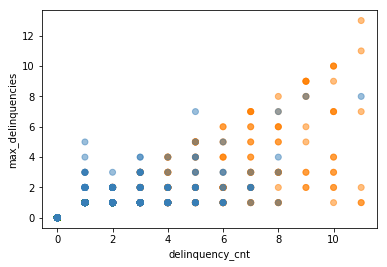

In [14]:
scatter_with_labels(data, "delinquency_cnt", "max_delinquencies", "m13")

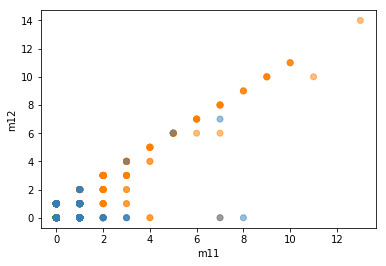

In [16]:
scatter_with_labels(data, "m11", "m12", "m13")

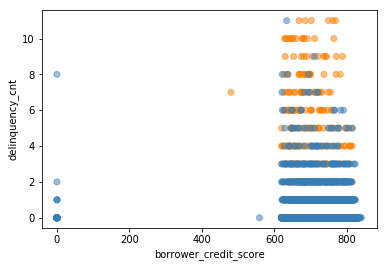

In [86]:
scatter_with_labels(data, "borrower_credit_score", "delinquency_cnt", "m13")

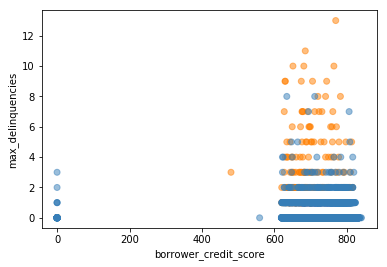

In [87]:
scatter_with_labels(data, "borrower_credit_score", "max_delinquencies", "m13")

In [120]:
full_data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m7,m8,m9,m10,m11,m12,total_delinquencies,max_delinquencies,delinquency_cnt,train_flag
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,1,0,0,0,0,0,1,1,1,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,1,0,1,1,1,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,1,1,1,1,3,1,3,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,6,7,8,9,10,11,55,10,10,1


In [14]:
data["m13"].value_counts()

0    115422
1       636
Name: m13, dtype: int64

In [19]:
pd.crosstab(data["m12"], data["m13"])

m13,0,1
m12,,
0,115221,336
1,194,172
2,4,43
3,0,28
4,1,14
5,0,7
6,1,13
7,1,6
8,0,5


In [13]:
pd.crosstab(data["m12"], data["m13"], normalize=1)

m13,0,1
m12,,
0,0.998259,0.528302
1,0.001681,0.270440
2,0.000035,0.067610
3,0.000000,0.044025
4,0.000009,0.022013
5,0.000000,0.011006
6,0.000009,0.020440
7,0.000009,0.009434
8,0.000000,0.007862


From above data we can see following:
If we use a logic that if m12 > 0, predict as 1, else 0. with this logic we will see precision = 0.5988 and recall = 0.4716; f1 score = 0.5277; 

In [21]:
data["m13_pred"] = data.apply(lambda x: 1 if x["m12"]>0 or x["max_delinquencies"]>0 else 0, axis=1)

In [25]:
print(classification_report(data["m13"], data["m13_pred"]))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    115422
           1       0.20      0.63      0.30       636

   micro avg       0.98      0.98      0.98    116058
   macro avg       0.60      0.81      0.65    116058
weighted avg       0.99      0.98      0.99    116058



In [22]:
confusion_matrix(data["m13"], data["m13_pred"])

array([[113814,   1608],
       [   233,    403]], dtype=int64)

In [20]:
pd.crosstab(data["max_delinquencies"], data["m13"])

m13,0,1
max_delinquencies,,
0,113945,291
1,1368,194
2,76,63
3,19,30
4,7,14
5,3,14
6,0,8
7,2,9
8,2,3


In [17]:
false_negatives = data[(data["m12"]==0)&(data["m13"]==1)]
pd.crosstab(false_negatives["m11"], false_negatives["m13"])

m13,1
m11,
0,299
1,31
2,3
4,2
7,1


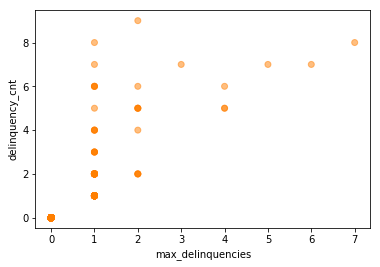

In [19]:
scatter_with_labels(false_negatives, "max_delinquencies", "delinquency_cnt", "m13")

In [13]:
data[data["loan_term"]<=180]["m13"].value_counts()

0    36128
1      107
Name: m13, dtype: int64

In [11]:
data["loan_term"].value_counts()

360    71812
180    28584
120     7061
240     6749
300      912
96       178
156       92
144       73
336       64
324       53
168       40
348       33
108       29
276       22
84        21
312       19
132       19
216       16
121       14
288       13
264       13
228        8
150        7
162        6
60         6
166        5
153        5
163        4
158        4
165        4
       ...  
91         1
219        1
347        1
100        1
220        1
93         1
157        1
349        1
94         1
290        1
223        1
280        1
295        1
359        1
172        1
274        1
351        1
83         1
275        1
174        1
110        1
85         1
88         1
149        1
341        1
86         1
171        1
278        1
107        1
319        1
Name: loan_term, Length: 140, dtype: int64

# Model Generation


In [16]:
train_data, val_data, train_labels, val_labels = train_test_split(data.drop(columns="m13"),data[["m13"]], test_size=0.25, stratify=data["m13"])

In [17]:
value_counts(train_labels,"m13")

,m13,m13_z
0,86566,0.99452
1,477,0.00548


In [18]:
value_counts(val_labels,"m13")

,m13,m13_z
0,28856,0.99452
1,159,0.00548


### OneClassSVM

In [37]:
from sklearn.svm import OneClassSVM


In [38]:
%%time
train_normal = train_data[train_labels["m13"]==0]
train_outliers = train_data[train_labels["m13"]==1]
outlier_prop = len(train_outliers)/len(train_normal)
svm_oneclass_fit = OneClassSVM(kernel="rbf", nu=outlier_prop, gamma=0.000001)
svm_oneclass_fit.fit(train_normal.drop(columns=drop_cols))

Wall time: 4min 22s


In [39]:
val_predict = svm_oneclass_fit.predict(val_data.drop(columns=drop_cols))

In [40]:
%%time
svm_oneclass_fit2 = OneClassSVM(kernel="rbf", nu=outlier_prop, gamma=0.0000001)
svm_oneclass_fit2.fit(train_normal.drop(columns=drop_cols))

Wall time: 3min 56s


In [41]:
%%time
svm_oneclass_fit3 = OneClassSVM(kernel="rbf", nu=outlier_prop, gamma=0.00001)
svm_oneclass_fit3.fit(train_normal.drop(columns=drop_cols))

Wall time: 3min 32s


In [45]:
val_predict.sum(), len(val_predict), len(val_predict) - val_predict.sum()

(27421, 29015, 1594)

## XGBoost

In [25]:
(train_labels.sum()/len(train_labels)).values[0]

0.005480050090185311

In [19]:
scale_var = 1/(train_labels.sum()/len(train_labels)).values[0] 

In [20]:
scale_var

182.48008385744234

In [37]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [3, 6],
              'min_child_weight': [5],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [50, 100, 200], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'scale_pos_weight':[5, 10, 20, 50],
              'seed': [1337]}

In [38]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [41]:
xgb_model = xgb.XGBClassifier()

In [47]:
%%time
clf = GridSearchCV(xgb_model, parameters, n_jobs=-1, 
                  cv=StratifiedKFold(n_splits=5), scoring="f1", verbose=2, refit=True)
clf.fit(train_data.drop(columns=drop_cols), train_labels)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.4min finished
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 5min 28s


In [48]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 5,
 'missing': -999,
 'n_estimators': 100,
 'nthread': 4,
 'objective': 'binary:logistic',
 'scale_pos_weight': 5,
 'seed': 1337,
 'silent': 1,
 'subsample': 0.8}

In [49]:
clf.best_score_

0.517254206736575

In [50]:
val_preidct = clf.predict(val_data.drop(columns=drop_cols))

In [54]:
f1_score(val_labels, val_predict)

0.5212121212121212

The f1 score is still less than using just m12 as label. We can see how these predictions are aligned with m12 scores

In [55]:
val_explore = val_data
val_explore["m13"] = val_labels["m13"]
val_explore["m13_pred"] = val_predict

In [56]:
val_explore.head()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,...,financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86,insurance_type_1.0,total_delinquencies,max_delinquencies,delinquency_cnt,m13,m13_pred
99419,679391550137,4.250,94000,360,2012-03-01,05/2012,74,2.0,38.0,779.0,...,0,0,0,0,0,0,0,0,0,0
47730,579196136586,3.500,200000,120,2012-03-01,05/2012,77,2.0,35.0,796.0,...,0,0,0,0,0,0,0,0,0,0
48272,891589564408,3.625,161000,180,2012-02-01,04/2012,44,2.0,27.0,797.0,...,0,0,1,0,0,0,0,0,0,0
77670,739026555646,3.250,72000,120,2012-02-01,04/2012,42,1.0,31.0,800.0,...,0,0,0,0,0,0,0,0,0,0
8711,424175335256,3.250,186000,180,2012-02-01,04/2012,75,2.0,17.0,805.0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
val_explore[(val_explore["m12"]==0)&(val_explore["m13"]==1)]["m13_pred"].value_counts()

0    69
1    10
Name: m13_pred, dtype: int64

In [58]:
val_explore[(val_explore["m12"]==1)&(val_explore["m13"]==0)]["m13_pred"].value_counts()

1    36
0    10
Name: m13_pred, dtype: int64

In [76]:
val_explore["m13_ensemble"] = val_explore.apply(lambda x:1 if max(x["m11"], x["m12"])>0 else 0, axis=1)

In [65]:
val_explore["m13_ensemble"].value_counts()

0    28830
1      185
Name: m13_ensemble, dtype: int64

In [66]:
f1_score(val_explore["m13"], val_explore["m13_ensemble"])

0.5232558139534883

In [68]:
f1_score(val_explore["m13"], val_explore["m12"].apply(lambda x:1 if x>0 else 0))

0.5614035087719299

In [69]:
confusion_matrix(val_explore["m13"], val_explore["m12"].apply(lambda x:1 if x>0 else 0))

array([[28810,    46],
       [   79,    80]], dtype=int64)

In [70]:
confusion_matrix(val_explore["m13"], val_explore["m13_pred"])

array([[28771,    85],
       [   73,    86]], dtype=int64)

In [77]:
confusion_matrix(val_explore["m13"], val_explore["m13_ensemble"])

array([[28759,    97],
       [   68,    91]], dtype=int64)

Lets look at some of the sample false positives and false negatives to get an idea

In [81]:
val_explore[((val_explore["m13"]==1)&(val_explore["m12"]==0))|((val_explore["m13"]==0)&(val_explore["m12"]==1))|((val_explore["m13"]==1)&(val_explore["m12"]==1))].to_csv("debug_false_cases_m12_flag.csv")

In [82]:
def create_label(row):
    if row["m13"]>0 and row["m12"]==0:
        return "fn"
    elif row["m12"]>0 and row["m13"]==0:
        return "fp"
    elif row["m12"] + row["m13"] ==0:
        return "tn"
    else:
        return "tp"

In [83]:
val_explore["flag"] = val_explore.apply(lambda row: create_label(row), axis=1)

In [88]:
col_level_summary = val_explore.groupby("flag").describe()

In [90]:
for col_ in list(val_explore.drop(columns=drop_cols)):
    if col_ == "flag":
        continue
    else:
        print(col_)
        print(col_level_summary[col_])

interest_rate
        count      mean       std    min     25%    50%     75%    max
flag                                                                  
fn       79.0  4.093228  0.468460  2.875  3.8125  4.125  4.4325  5.125
fp       46.0  4.146739  0.448999  2.875  3.8750  4.125  4.5000  5.250
tn    28810.0  3.865153  0.460689  2.250  3.5000  3.875  4.1250  6.750
tp       80.0  4.278875  0.465451  3.000  4.0000  4.375  4.5000  5.750
unpaid_principal_bal
        count           mean            std      min       25%       50%  \
flag                                                                       
fn       79.0  184949.367089   97536.173268  24000.0  107500.0  169000.0   
fp       46.0  198934.782609  107073.474705  60000.0  124000.0  168000.0   
tn    28810.0  208430.093717  114859.521282  14000.0  120000.0  183000.0   
tp       80.0  167725.000000  107224.828860  38000.0  102250.0  138000.0   

           75%       max  
flag                      
fn    244000.0  417000.0  
f

m1 seems to be another important case. If someone defaults within m1, they are more likely to be delinquent. So if we add a flag that m1 >0 => then it might improve our recall

# Difference between val and test datasets?
Why is there so much difference in val error and leaderboard score? 

In [98]:
val_describe = val_explore.groupby("m12").describe()
test_describe = test_data.groupby("m12").describe()

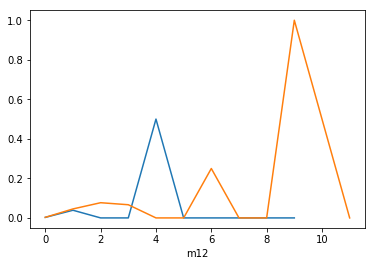

In [120]:
test_describe["m1"]["mean"].plot()
val_describe["m1"]["mean"].plot()

In [106]:
for col_ in list(test_data.drop(columns=drop_cols)):
    print(col_)
    print("Test")
    print(test_describe[col_])
    print("\nVal")
    print(val_describe[col_])
    print("\n\n")

interest_rate
Test
       count      mean       std    min      25%     50%      75%    max
m12                                                                     
0    35724.0  3.871759  0.460194  2.375  3.50000  3.8750  4.12500  6.625
1      103.0  4.102854  0.449253  3.000  3.87500  4.1250  4.37500  5.125
2       11.0  4.279545  0.460546  3.700  4.06250  4.2500  4.37500  5.500
3       11.0  4.079545  0.720834  2.500  3.81250  4.0000  4.43750  5.125
4        2.0  4.375000  0.176777  4.250  4.31250  4.3750  4.43750  4.500
5        4.0  4.185000  0.256223  3.875  4.06250  4.1875  4.31000  4.490
6        4.0  4.375000  0.102062  4.250  4.34375  4.3750  4.40625  4.500
7        4.0  4.500000  0.568258  4.000  4.09375  4.3750  4.78125  5.250
8        2.0  4.437500  0.088388  4.375  4.40625  4.4375  4.46875  4.500
9        1.0  4.500000       NaN  4.500  4.50000  4.5000  4.50000  4.500

Val
       count      mean       std    min     25%    50%      75%    max
m12                          

KeyError: 'm12'

In [91]:
val_explore["m1_m12"] = val_explore.apply(lambda row:1 if row["m1"] + row["m12"]>0 else 0, axis=1)

In [95]:
f1_score(val_explore["m13"], val_explore["m1_m12"])

0.47486033519553067

In [94]:
f1_score(val_explore["m13"], val_explore["m12"].apply(lambda row:1 if row>0 else 0))

0.5614035087719299

In [96]:
confusion_matrix(val_explore["m13"], val_explore["m1_m12"])

array([[28742,   114],
       [   74,    85]], dtype=int64)

In [97]:
confusion_matrix(val_explore["m13"], val_explore["m12"].apply(lambda row:1 if row>0 else 0))

array([[28810,    46],
       [   79,    80]], dtype=int64)

In [ ]:
print df.groupby('name').describe().unstack(1)


In [78]:
val_explore[(val_explore["m13"]==1)&(val_explore["m12"]==0)].head(10)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,...,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86,insurance_type_1.0,total_delinquencies,max_delinquencies,delinquency_cnt,m13,m13_pred,m13_ensemble
626,331675090018,3.875,308000,360,2012-02-01,04/2012,87,2.0,30.0,770.0,...,0,0,0,0,0,0,0,1,0,0
338,399834804185,4.000,306000,360,2012-01-01,03/2012,60,1.0,17.0,778.0,...,0,0,0,0,0,0,0,1,0,0
156,403146472400,3.875,70000,360,2012-02-01,04/2012,90,1.0,26.0,780.0,...,0,0,0,0,2,1,2,1,0,0
344,770262399158,4.125,75000,360,2012-01-01,02/2012,32,1.0,35.0,645.0,...,0,1,0,0,6,2,5,1,1,1
71,791387598450,3.625,220000,240,2012-02-01,04/2012,54,1.0,31.0,764.0,...,0,0,0,0,0,0,0,1,0,0
298,359965906598,3.875,136000,360,2012-02-01,05/2012,58,1.0,28.0,753.0,...,0,1,0,0,0,0,0,1,0,0
594,700963557467,4.750,84000,360,2012-02-01,04/2012,75,1.0,11.0,754.0,...,0,0,1,0,1,1,1,1,0,0
564,475947968920,4.625,29000,360,2012-01-01,03/2012,75,1.0,42.0,734.0,...,0,0,1,0,0,0,0,1,0,0
74,179639561446,4.125,224000,360,2012-03-01,05/2012,76,1.0,44.0,733.0,...,0,1,0,0,5,2,4,1,1,1
452,592107049418,4.125,65000,360,2012-02-01,04/2012,77,1.0,43.0,718.0,...,0,0,1,0,3,1,3,1,1,1


In [22]:
drop_cols = ["loan_id","first_payment_date", "origination_date"]

In [26]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05, scale_pos_weight=scale_var/20)

In [27]:
%%time
clf.fit(train_data.drop(columns=drop_cols), train_labels)

C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 17.7 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=9.124004192872118,
       seed=None, silent=True, subsample=1)

In [28]:
val_predict = clf.predict(val_data.drop(columns=drop_cols))

In [36]:
f1_score(val_labels, val_predict)

0.5212121212121212

In [31]:
print(classification_report(val_labels, val_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28856
           1       0.50      0.54      0.52       159

   micro avg       0.99      0.99      0.99     29015
   macro avg       0.75      0.77      0.76     29015
weighted avg       0.99      0.99      0.99     29015



In [29]:
confusion_matrix(val_labels, val_predict)

array([[28771,    85],
       [   73,    86]], dtype=int64)

In [45]:
test_predict = clf.predict(test_data.drop(columns=drop_cols))

In [46]:
test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
test_data.head()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,...,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86,insurance_type_1.0,total_delinquencies,max_delinquencies,delinquency_cnt
0,1,3.875,417000,360,01/02/12,Apr-12,75,1.0,20.0,790.0,...,0,0,0,0,0,0,0,0,0,0
1,2,4.500,113000,360,01/02/12,Apr-12,80,2.0,33.0,793.0,...,0,0,0,0,0,1,0,0,0,0
2,3,4.500,72000,360,01/01/12,Mar-12,75,1.0,34.0,710.0,...,0,0,0,0,0,1,0,0,0,0
3,4,4.125,123000,180,01/02/12,Apr-12,41,2.0,24.0,798.0,...,0,0,0,0,0,0,0,0,0,0
4,5,3.250,166000,180,01/02/12,Apr-12,53,2.0,12.0,767.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
test_data['m13'] = test_predict

In [ ]:
test_data[["loan_id", "m13"]].to_csv("xgb_submission.csv", index=None)

Above submission got a LB score of 0.215 :(

# Simple logic of carrying m12 bool flag

In [20]:
test_data.head()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,...,"financial_institution_Swanson, Newton and Miller","financial_institution_Taylor, Hunt and Rodriguez",financial_institution_Thornton-Davis,"financial_institution_Turner, Baldwin and Rhodes",loan_purpose_B12,loan_purpose_C86,insurance_type_1.0,total_delinquencies,max_delinquencies,delinquency_cnt
0,1,3.875,417000,360,01/02/12,Apr-12,75,1.0,20.0,790.0,...,0,0,0,0,0,0,0,0,0,0
1,2,4.500,113000,360,01/02/12,Apr-12,80,2.0,33.0,793.0,...,0,0,0,0,0,1,0,0,0,0
2,3,4.500,72000,360,01/01/12,Mar-12,75,1.0,34.0,710.0,...,0,0,0,0,0,1,0,0,0,0
3,4,4.125,123000,180,01/02/12,Apr-12,41,2.0,24.0,798.0,...,0,0,0,0,0,0,0,0,0,0
4,5,3.250,166000,180,01/02/12,Apr-12,53,2.0,12.0,767.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_data["m13"] = test_data["m12"].astype(bool).astype(int)

In [23]:
test_data[["loan_id", "m13"]].to_csv("m12_based.csv", index=None)

This gave a score of 0.30

## Building a model excluding the Positives predicted by m12 variable

In [121]:
data_filtered = data[data["m12"]==0]

In [123]:
train_data, val_data, train_labels, val_labels = train_test_split(data_filtered.drop(columns="m13"),data_filtered[["m13"]], test_size=0.25, stratify=data_filtered["m13"])

In [133]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05, scale_pos_weight=5)

In [134]:
%%time
clf.fit(train_data.drop(columns=drop_cols), train_labels)

C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 49.9 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
       silent=True, subsample=1)

In [128]:
val_predict = clf.predict(val_data.drop(columns=drop_cols))

In [129]:
f1_score(val_labels, val_predict)

0.11214953271028034

In [31]:
print(classification_report(val_labels, val_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28856
           1       0.50      0.54      0.52       159

   micro avg       0.99      0.99      0.99     29015
   macro avg       0.75      0.77      0.76     29015
weighted avg       0.99      0.99      0.99     29015



In [132]:
confusion_matrix(val_labels, val_predict)[1,0]

78

In [130]:
confusion_matrix(val_labels, val_predict)

array([[28789,    17],
       [   78,     6]], dtype=int64)

In [45]:
test_predict = clf.predict(test_data.drop(columns=drop_cols))

In [46]:
test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

IsolationForest and LocalOutlierFactor

In [136]:
from sklearn.ensemble import IsolationForest

from sklearn.neighbors import LocalOutlierFactor

In [147]:
outlier_fraction = train_labels["m13"].sum()/len(train_labels)

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(train_data.drop(columns=drop_cols)), 
                                       contamination=outlier_fraction,random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)}

n_outliers = train_labels["m13"].sum()
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(train_data.drop(columns=drop_cols))
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(train_data.drop(columns=drop_cols))
        scores_prediction = clf.decision_function(train_data.drop(columns=drop_cols))
        y_pred = clf.predict(train_data.drop(columns=drop_cols))
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != train_labels["m13"]).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(train_labels["m13"],y_pred))
    print("Classification Report :")
    print(classification_report(train_labels["m13"],y_pred))

C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 434
Accuracy Score :
0.9949923269525887
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86415
           1       0.14      0.14      0.14       252

   micro avg       0.99      0.99      0.99     86667
   macro avg       0.57      0.57      0.57     86667
weighted avg       0.99      0.99      0.99     86667

Local Outlier Factor: 502
Accuracy Score :
0.9942077145857131
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86415
           1       0.00      0.00      0.00       252

   micro avg       0.99      0.99      0.99     86667
   macro avg       0.50      0.50      0.50     86667
weighted avg       0.99      0.99      0.99     86667



In [144]:
from sklearn.metrics import accuracy_score

In [150]:
drop_cols + ["m13"]

['loan_id', 'first_payment_date', 'origination_date', 'm13']

In [157]:
train_data, val_data, train_labels, val_labels = train_test_split(data.drop(columns="m13"),data[["m13"]], test_size=0.25, stratify=data["m13"])

train_data = train_data.drop(columns=drop_cols)
val_data = val_data.drop(columns=drop_cols)

In [158]:
outlier_fraction = train_labels["m13"].sum()/len(train_labels)

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(train_data), 
                                       contamination=outlier_fraction,random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)}

n_outliers = train_labels["m13"].sum()
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(train_data)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(train_data)
        scores_prediction = clf.decision_function(train_data)
        y_pred = clf.predict(train_data)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != train_labels["m13"]).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(train_labels["m13"],y_pred))
    print("Classification Report :")
    print(classification_report(train_labels["m13"],y_pred))

C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 584
Accuracy Score :
0.9932906724262721
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86566
           1       0.39      0.39      0.39       477

   micro avg       0.99      0.99      0.99     87043
   macro avg       0.69      0.69      0.69     87043
weighted avg       0.99      0.99      0.99     87043

Local Outlier Factor: 954
Accuracy Score :
0.9890398998196294
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     86566
           1       0.00      0.00      0.00       477

   micro avg       0.99      0.99      0.99     87043
   macro avg       0.50      0.50      0.50     87043
weighted avg       0.99      0.99      0.99     87043



In [160]:
val_pred = classifiers["Isolation Forest"].predict(val_data)

C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [161]:
val_pred[val_pred==1]=0
val_pred[val_pred==-1]=1

In [163]:
f1_score(val_labels["m13"], val_pred)

0.4131147540983606

In [164]:
confusion_matrix(val_labels["m13"], val_pred)

array([[28773,    83],
       [   96,    63]], dtype=int64)

In [166]:
val_explore = val_data
val_explore["m13"] =  val_labels["m13"]
val_explore["pred"] = val_pred

In [167]:
confusion_matrix(val_explore["m13"], val_explore["pred"])

array([[28773,    83],
       [   96,    63]], dtype=int64)

In [213]:
val_explore["ensemble1"] = val_explore.apply(lambda x: 1 if x["m12"]>0 or x["pred"]>0 else 0 , axis=1)
val_explore["ensemble2"] = val_explore.apply(lambda x: 0 if x["m12"]==1 and x["pred"]==0 else  int(bool(x["m12"])), axis=1)
val_explore["ensemble3"] = val_explore.apply(lambda x: 1 if x["m12"]==0 and x["total_delinquencies"]>10 else  int(bool(x["m12"])), axis=1)

In [177]:
f1_score(val_explore["m13"], val_explore["m12"].apply(lambda x:1 if x >0 else 0))

0.5187713310580205

In [178]:
f1_score(val_explore["m13"], val_explore["pred"])

0.4131147540983606

In [179]:
f1_score(val_explore["m13"], val_explore["ensemble1"])

0.47150259067357514

In [180]:
f1_score(val_explore["m13"], val_explore["ensemble2"])

0.47222222222222215

In [214]:
f1_score(val_explore["m13"], val_explore["ensemble3"])

0.531986531986532

In [215]:
test_data["m13"] = test_data.apply(lambda x: 1 if x["m12"]==0 and x["total_delinquencies"]>10 else  int(bool(x["m12"])), axis=1)

In [216]:
test_data[["loan_id", "m13"]].to_csv("total_delinquencies_submission.csv", index=None)

In [169]:
val_explore[(val_explore["m12"]==0)&(val_explore["pred"]==1)]["m13"].value_counts()

0    78
1    15
Name: m13, dtype: int64

In [184]:
val_explore[(val_explore["m12"]==0)&(val_explore["m13"]==0)&(val_explore["borrower_credit_score"]>0)]["borrower_credit_score"].describe()

count    28788.000000
mean       770.805926
std         38.463062
min        559.000000
25%        752.000000
50%        782.000000
75%        799.000000
max        840.000000
Name: borrower_credit_score, dtype: float64

In [183]:
val_explore[(val_explore["m12"]==0)&(val_explore["m13"]==1)]["borrower_credit_score"].describe()

count     83.000000
mean     725.927711
std       53.172931
min      627.000000
25%      679.500000
50%      728.000000
75%      772.000000
max      818.000000
Name: borrower_credit_score, dtype: float64

In [188]:
val_explore[(val_explore["m12"]==1)&(val_explore["borrower_credit_score"]>0)&(val_explore["borrower_credit_score"]>780)]["m13"].value_counts()

0    11
1     7
Name: m13, dtype: int64

In [236]:
val_explore[(val_explore["m12"]==1)&(val_explore["total_delinquencies"]==1)]["m13"].value_counts()

0    10
1     6
Name: m13, dtype: int64

In [170]:
val_explore[(val_explore["m12"]==1)&(val_explore["pred"]==0)]["m13"].value_counts()

0    52
1    25
Name: m13, dtype: int64

In [168]:
pd.crosstab(val_explore["m12"], val_explore["pred"])

pred,0,1
m12,,
0,28788,93
1,77,21
2,4,7
3,0,10
4,0,3
5,0,3
6,0,4
7,0,2
9,0,1


In [193]:
drop_cols

['loan_id', 'first_payment_date', 'origination_date']

In [208]:
val_explore[(val_explore["m13"]==1)&(val_explore["m12"]==1)]["total_delinquencies"].describe()

count    42.000000
mean      3.452381
std       7.228677
min       0.000000
25%       0.000000
50%       1.000000
75%       4.000000
max      33.000000
Name: total_delinquencies, dtype: float64

In [210]:
val_explore[(val_explore["m13"]==0)&(val_explore["m12"]==0)]["total_delinquencies"].describe()

count    28798.000000
mean         0.016494
std          0.201839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: total_delinquencies, dtype: float64

In [206]:
val_explore[(val_explore["m13"]==1)&(val_explore["m12"]==0)]["total_delinquencies"].describe()

count    83.000000
mean      1.457831
std       4.058419
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max      29.000000
Name: total_delinquencies, dtype: float64

In [212]:
val_explore[(val_explore["total_delinquencies"]>10)&(val_explore["m12"]==0)]["m13"].value_counts()

1    3
0    1
Name: m13, dtype: int64

In [194]:
pd.crosstab(data["first_payment_date"], data["origination_date"])

origination_date,2012-01-01,2012-02-01,2012-03-01
first_payment_date,,,
02/2012,524,0,0
03/2012,46401,1279,0
04/2012,2168,49482,1190
05/2012,0,1573,13441


In [196]:
pd.crosstab(data["first_payment_date"], data["origination_date"], data["m13"], aggfunc="mean")

origination_date,2012-01-01,2012-02-01,2012-03-01
first_payment_date,,,
02/2012,0.01145,NaN,NaN
03/2012,0.00625,0.004691,NaN
04/2012,0.00369,0.005396,0.004202
05/2012,NaN,0.003814,0.003571


# Scaling the data

In [237]:
from sklearn.preprocessing import StandardScaler

In [255]:
train_data, val_data, train_labels, val_labels = train_test_split(data.drop(columns="m13"),data[["m13"]], test_size=0.25, stratify=data["m13"])
train_data = train_data.drop(columns=drop_cols)
val_data = val_data.drop(columns=drop_cols)

sc= StandardScaler()
train_data_z = sc.fit_transform(train_data)

val_data_z = sc.transform(val_data)

C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dilee\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


In [261]:
train_data_z = pd.DataFrame(train_data_z, columns=list(train_data))
val_data_z = pd.DataFrame(val_data_z, columns=list(train_data))

In [242]:
outlier_fraction = train_labels["m13"].sum()/len(train_labels)

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(train_data), 
                                       contamination=outlier_fraction,random_state=42, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)}

n_outliers = train_labels["m13"].sum()
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(train_data)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(train_data)
        scores_prediction = clf.decision_function(train_data)
        y_pred = clf.predict(train_data)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != train_labels["m13"]).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(train_labels["m13"],y_pred))
    print("Classification Report :")
    print(classification_report(train_labels["m13"],y_pred))

C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 592
Accuracy Score :
0.9931987638293717
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     86566
           1       0.38      0.38      0.38       477

   micro avg       0.99      0.99      0.99     87043
   macro avg       0.69      0.69      0.69     87043
weighted avg       0.99      0.99      0.99     87043

Local Outlier Factor: 950
Accuracy Score :
0.9890858541180796
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     86566
           1       0.00      0.00      0.00       477

   micro avg       0.99      0.99      0.99     87043
   macro avg       0.50      0.50      0.50     87043
weighted avg       0.99      0.99      0.99     87043



In [227]:
test_data[drop_cols].head()

,loan_id,first_payment_date,origination_date
0,1,Apr-12,01/02/12
1,2,Apr-12,01/02/12
2,3,Mar-12,01/01/12
3,4,Apr-12,01/02/12
4,5,Apr-12,01/02/12


In [231]:
pd.to_datetime(test_data["origination_date"]).value_counts()

2012-01-02    16423
2012-01-01    15051
2012-01-03     4392
Name: origination_date, dtype: int64

# Undersampling

In [245]:
train_labels["m13"].value_counts()

0    86566
1      477
Name: m13, dtype: int64

Total 477 delinqeuncy cases in training dataset. Will create random undersampling from this. First shuffle and then create

In [ ]:
clfs=[]
for i in range(20):
    train_labels_resampled = train_labels.sample(frac=1).reset_index(drop=True)
    fraud_df = train_data_z.loc[train_labels_resampled['m13'] == 1]
    non_fraud_df = train_data_z.loc[train_labels_resampled['m13'] == 0][:sum(train_labels["m13"])]
    normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
    train_data_sampled = normal_distributed_df.sample(frac=1, random_state=42)
    train_labels_sampled = train_labels_resampled.loc[train_data_sampled.index]
    clf = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05)
    clf.fit(train_data_sampled, train_labels_sampled)
    clfs.append(clf)

In [287]:
train_labels_resampled = train_labels.sample(frac=1).reset_index(drop=True)

# amount of fraud classes 492 rows.
fraud_df = train_data_z.loc[train_labels_resampled['m13'] == 1]
non_fraud_df = train_data_z.loc[train_labels_resampled['m13'] == 0][:10*sum(train_labels["m13"])]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
train_data_sampled = normal_distributed_df.sample(frac=1, random_state=42)

#new_df.head()


train_labels_sampled = train_labels_resampled.loc[train_data_sampled.index]

In [293]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=100, learning_rate=0.05, scale_pos_weight=5)

In [294]:
%%time
clf.fit(train_data_sampled, train_labels_sampled)

C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dilee\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 2.88 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=5, seed=None,
       silent=True, subsample=1)

In [295]:
val_predict = clf.predict(val_data_z)

In [296]:
f1_score(val_labels, val_predict)

0.01584158415841584

In [297]:
print(classification_report(val_labels, val_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28856
           1       0.01      0.03      0.02       159

   micro avg       0.98      0.98      0.98     29015
   macro avg       0.50      0.51      0.50     29015
weighted avg       0.99      0.98      0.99     29015



In [298]:
confusion_matrix(val_labels, val_predict)

array([[28514,   342],
       [  155,     4]], dtype=int64)

In [279]:
from sklearn.manifold import TSNE

In [299]:
%%time
# T-SNE Implementation

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(train_data_sampled.values)


Wall time: 1min 42s


In [284]:
from sklearn.decomposition import PCA, TruncatedSVD

In [300]:

X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(train_data_sampled.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(train_data_sampled.values)


In [282]:
import matplotlib.patches as mpatches

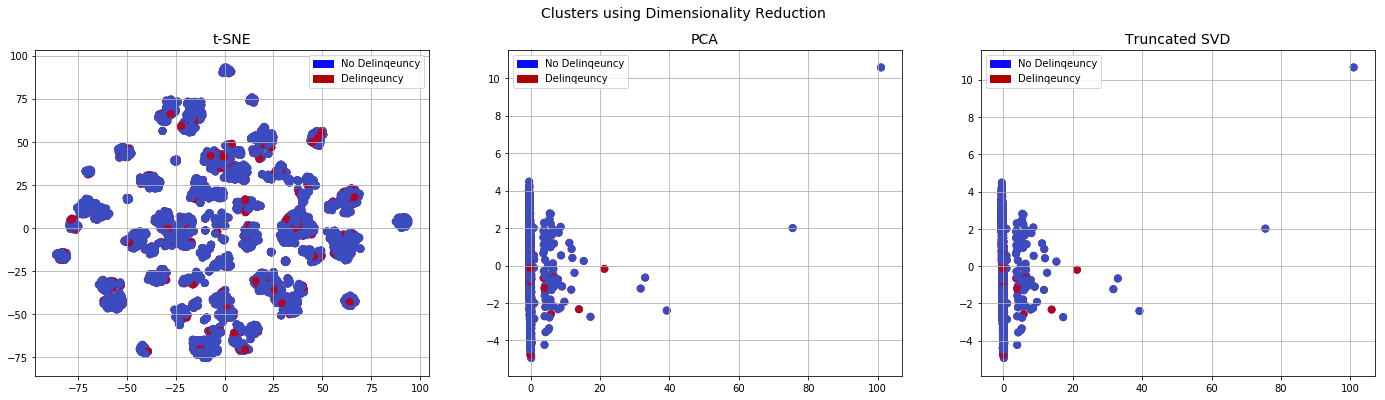

In [301]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Delinqeuncy')
red_patch = mpatches.Patch(color='#AF0000', label='Delinqeuncy')

ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(train_labels_sampled["m13"]==0), cmap="coolwarm", label="No delinqeuncy", linewidth=2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(train_labels_sampled["m13"]==1), cmap="coolwarm", label="delinqeuncy", linewidth=2)
ax1.legend(handles=[blue_patch, red_patch])
ax1.set_title("t-SNE", fontsize=14)
ax1.grid(True)

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(train_labels_sampled["m13"]==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(train_labels_sampled["m13"]==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(train_labels_sampled["m13"]==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(train_labels_sampled["m13"]==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

